### 数据预处理

In [ ]:
import pandas as pd

# 读取训练集和测试集的 CSV 文件
ratings_train = pd.read_csv("ratings_train.csv")
ratings_test = pd.read_csv("ratings_test.csv")
movies = pd.read_csv("movies.csv")

# 查看数据结构
print("ratings_train 数据结构:")
print(ratings_train.info())  # 展示数据的总体结构


print("\nratings_test 数据结构:")
print(ratings_test.info())


print("\nmovies 数据结构:")
print(movies.info())


In [ ]:
# 简单查看数据
print(movies.head())
print(ratings_train.head())
print(ratings_test.head())

In [ ]:
# 将 timestamp 列转换为时间戳（如果它是日期格式）
ratings_train['timestamp'] = pd.to_datetime(ratings_train['timestamp'])
ratings_train['timestamp'] = ratings_train['timestamp'].view('int64') / 10**9  # 转换为秒级时间戳

# 计算皮尔逊相关系数
correlation = ratings_train['timestamp'].corr(ratings_train['rating'])

print("Timestamp 和 Rating 之间的相关度:", correlation)


In [ ]:
merged_1 = pd.merge(ratings_train, movies, on='movieId', how='outer')
merged_1.to_csv('merged_1.csv', index=False, encoding='utf-8')

In [27]:
merged_2 = pd.merge(ratings_train, movies, on='movieId', how='inner')
merged_2.to_csv('merged_2.csv', index=False, encoding='utf-8')

Year-Month column:
            timestamp year_month
0 2009-11-07 16:14:39    2009-11
1 2003-03-07 21:28:13    2003-03
2 2010-03-18 09:24:10    2010-03
3 2016-06-26 13:05:09    2016-06
4 2016-05-07 18:01:27    2016-05
Exploded Movies DataFrame:
   movieId                                       genres      genre
0        1  Adventure|Animation|Children|Comedy|Fantasy  Adventure
0        1  Adventure|Animation|Children|Comedy|Fantasy  Animation
0        1  Adventure|Animation|Children|Comedy|Fantasy   Children
0        1  Adventure|Animation|Children|Comedy|Fantasy     Comedy
0        1  Adventure|Animation|Children|Comedy|Fantasy    Fantasy
Monthly Average:
  year_month      genre    rating
0    1995-01     Comedy  3.000000
1    1995-01      Crime  3.000000
2    1995-01   Thriller  3.000000
3    1996-03     Action  3.733333
4    1996-03  Adventure  4.083333


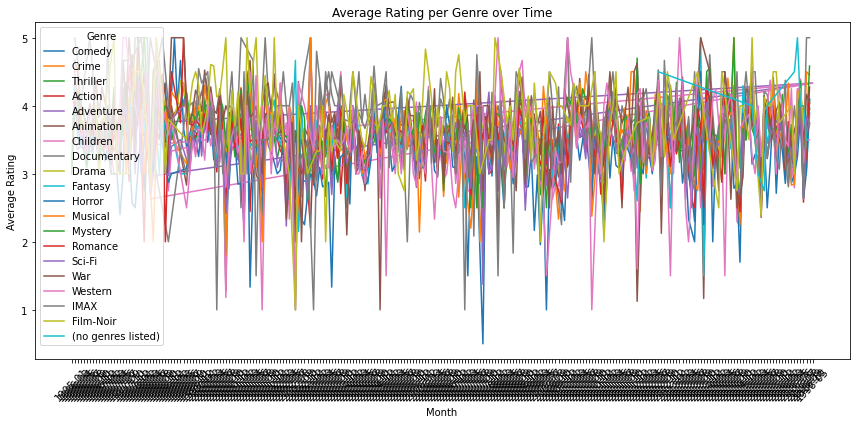

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 ratings_train 和 movies 数据
ratings_train = pd.read_csv('ratings_train.csv', encoding='utf-8')
movies = pd.read_csv('movies.csv', encoding='utf-8')

# 将 ratings_train 中的 timestamp（float64，即 Unix 时间戳）转换为 datetime 格式
ratings_train['timestamp'] = pd.to_datetime(ratings_train['timestamp'], unit='s')

# 使用已经转换好的 timestamp 生成日期，并提取年月信息
ratings_train['year_month'] = ratings_train['timestamp'].dt.to_period('M')

# 检查 year_month 列
print("Year-Month column:")
print(ratings_train[['timestamp', 'year_month']].head())

# 拆分 genres 列，这里以字母 'I' 作为分隔符
movies['genre_list'] = movies['genres'].str.split('|')

# 展开 genres 列并清理数据
movies_exploded = movies.explode('genre_list').rename(columns={'genre_list': 'genre'})

# 检查拆分结果
print("Exploded Movies DataFrame:")
print(movies_exploded[['movieId', 'genres', 'genre']].head())

# 在 ratings_train 和 movies_exploded 中分别提取 movieId 对应的数据
# 将 ratings_train 的每个 movieId 对应的 genre 从 movies_exploded 中获取
df = pd.merge(ratings_train, movies_exploded[['movieId', 'genre']], on='movieId', how='inner')

# 按每个月和每个 genre 分组，计算平均 rating
monthly_avg = df.groupby(['year_month', 'genre'])['rating'].mean().reset_index()

# 打印计算结果
print("Monthly Average:")
print(monthly_avg.head())

# 绘制每个 genre 的评分变化图
if not monthly_avg.empty:
    plt.figure(figsize=(12, 6))
    for genre in monthly_avg['genre'].unique():
        genre_data = monthly_avg[monthly_avg['genre'] == genre]
        plt.plot(genre_data['year_month'].astype(str), genre_data['rating'], label=genre)

    plt.xlabel('Month')
    plt.ylabel('Average Rating')
    plt.title('Average Rating per Genre over Time')
    plt.xticks(rotation=45)
    plt.legend(title='Genre')
    plt.tight_layout()
    plt.show()
else:
    print("No data to plot.")


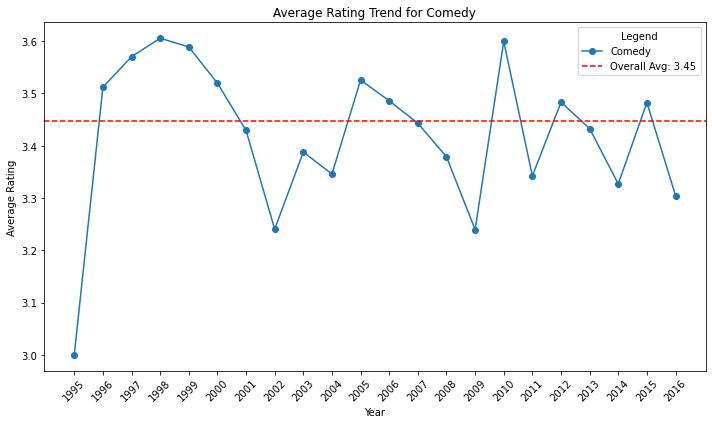

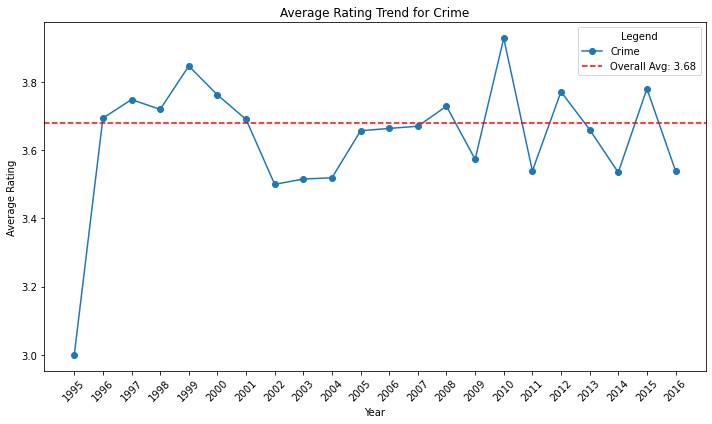

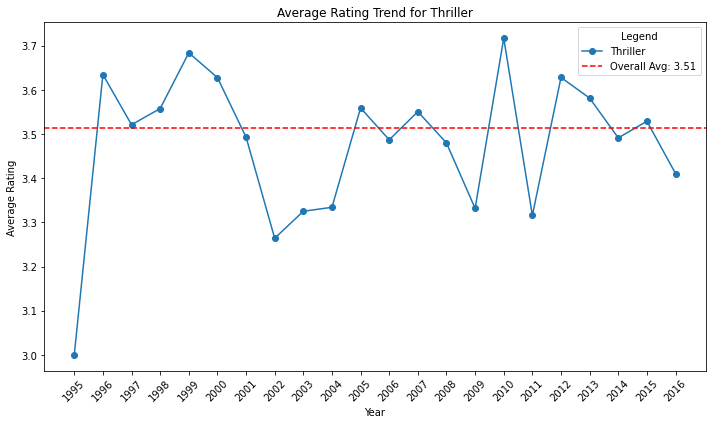

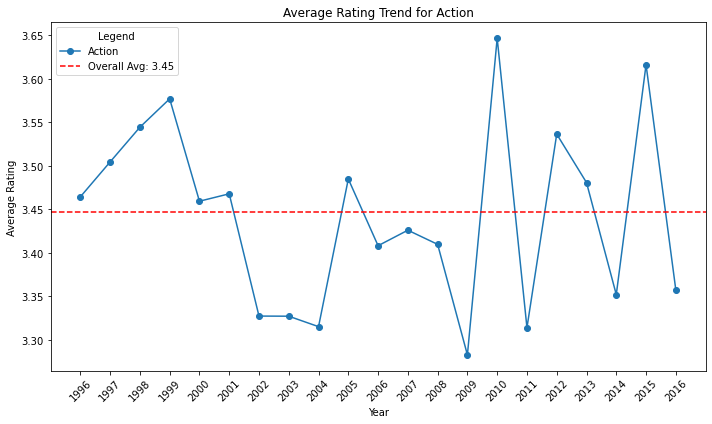

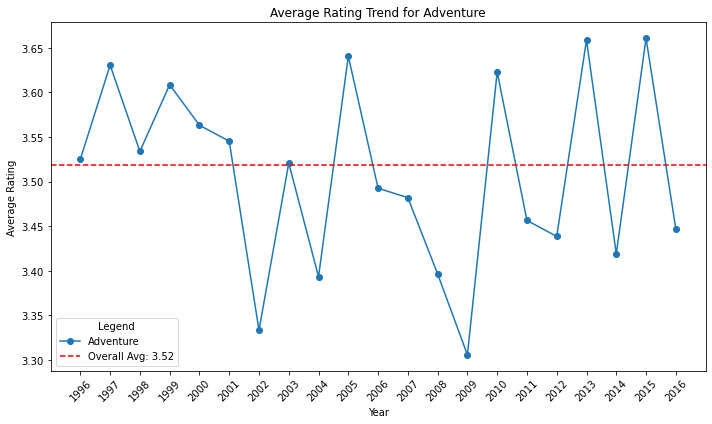

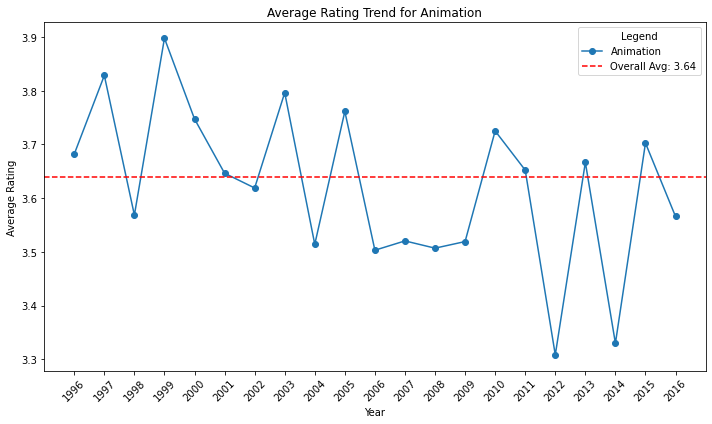

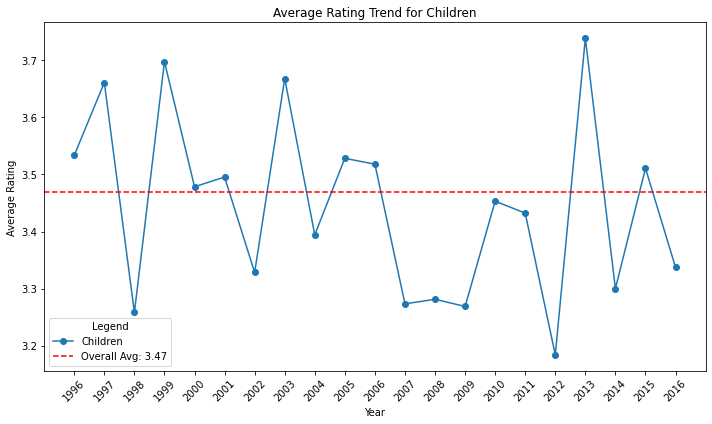

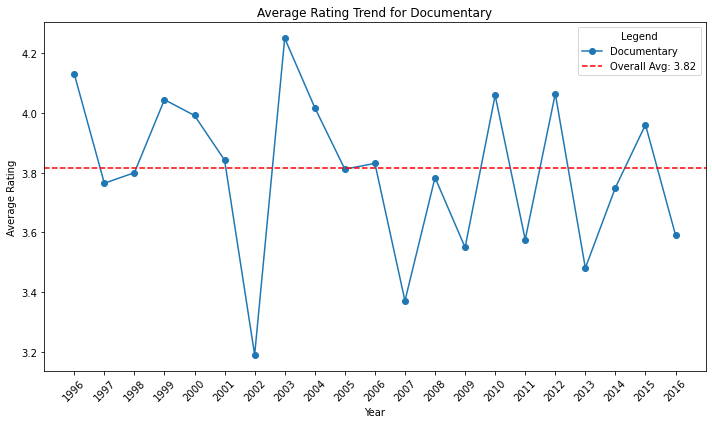

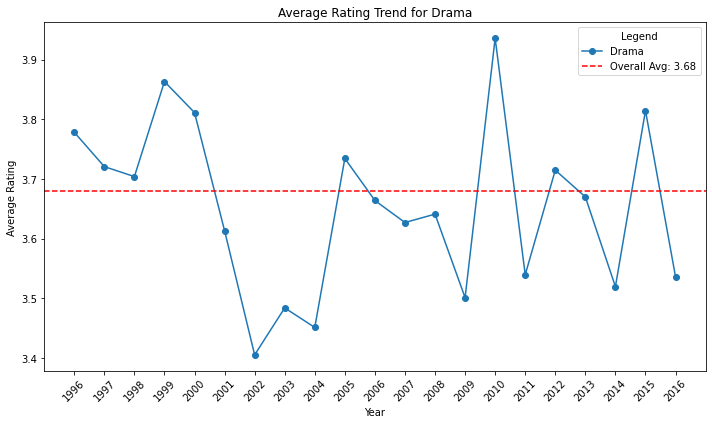

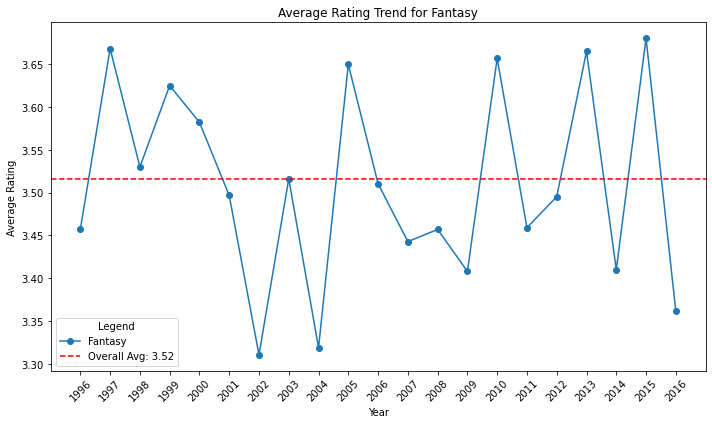

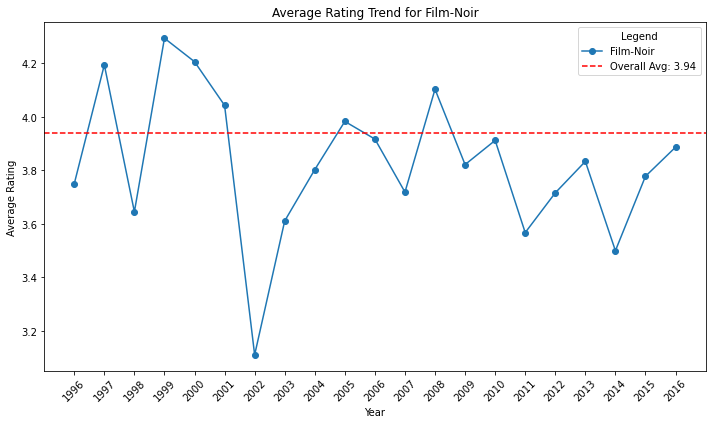

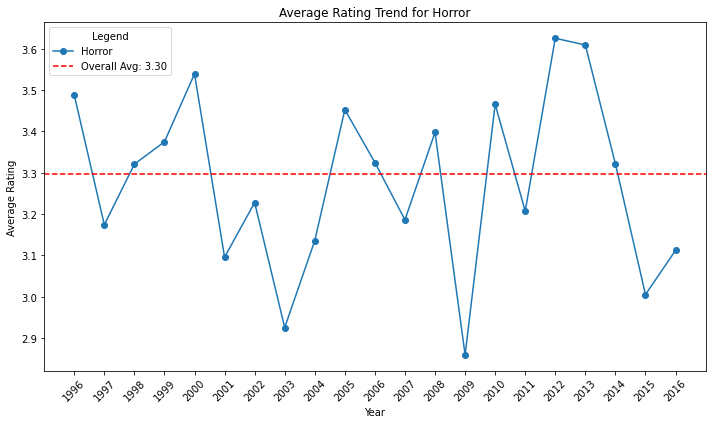

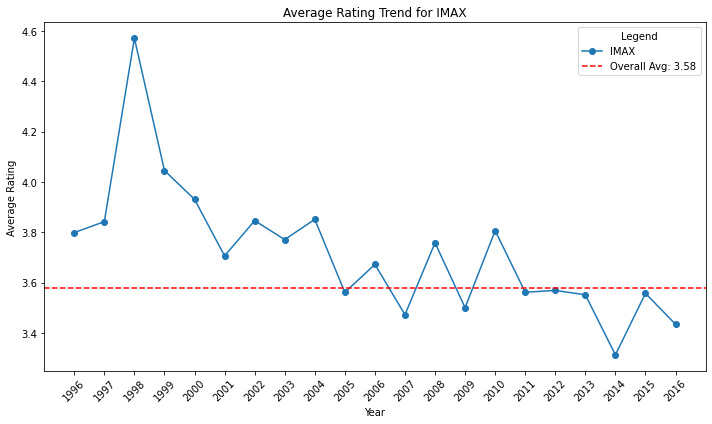

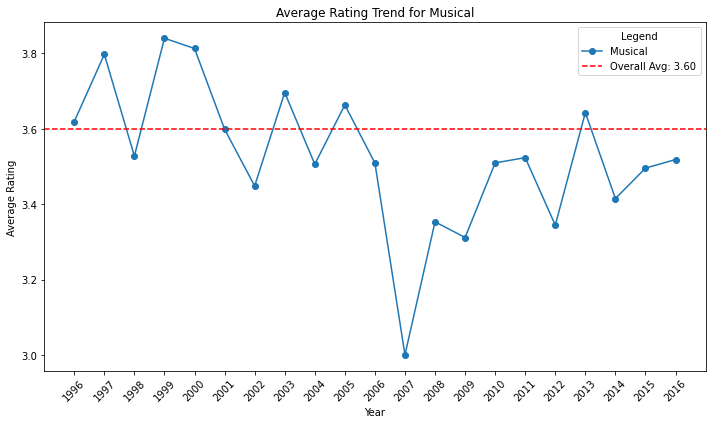

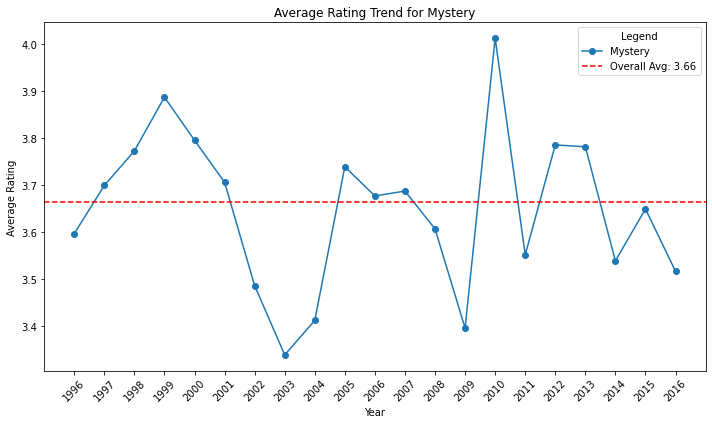

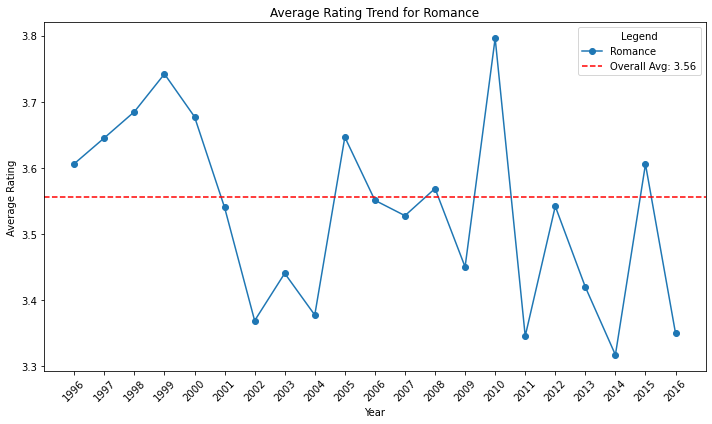

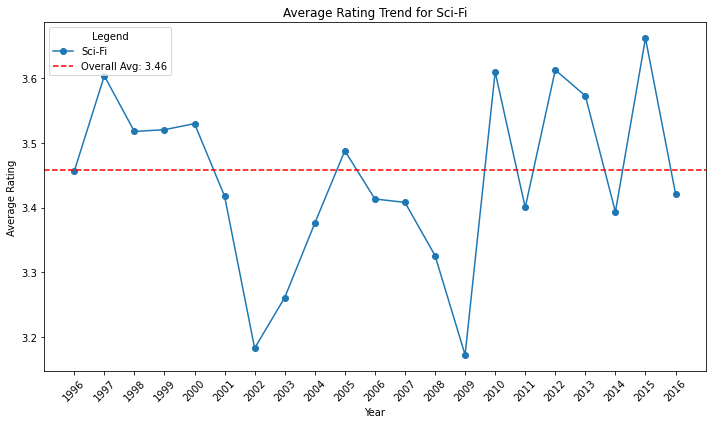

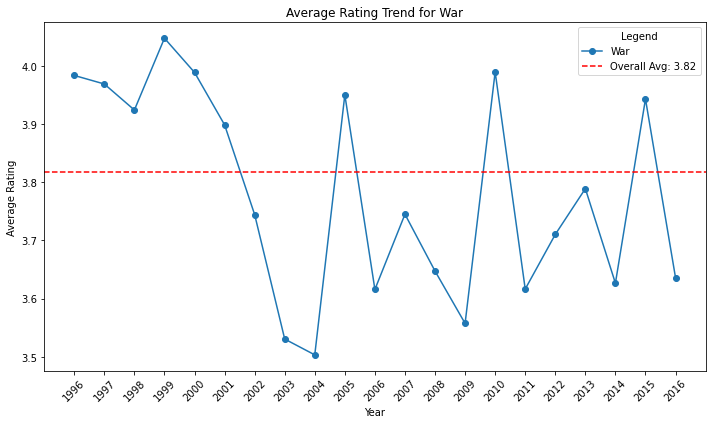

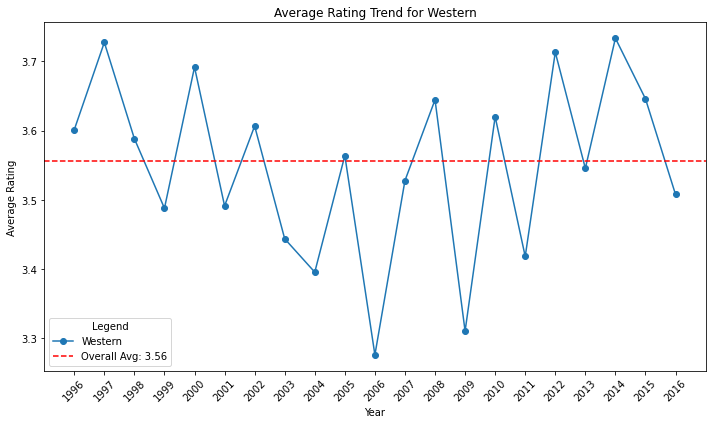

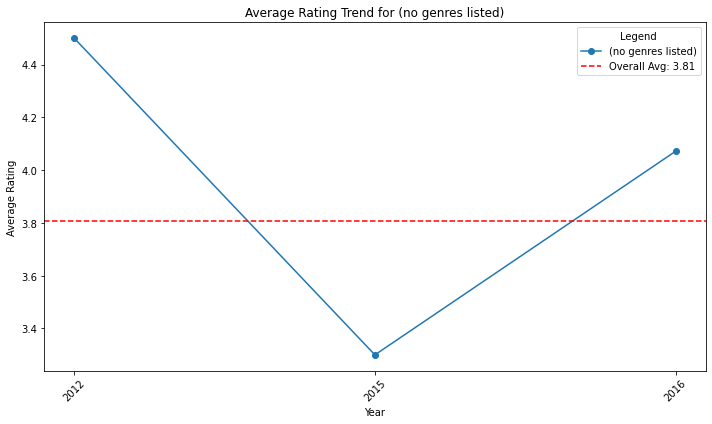

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 读取 ratings_train 和 movies 数据
ratings_train = pd.read_csv('ratings_train.csv', encoding='utf-8')
movies = pd.read_csv('movies.csv', encoding='utf-8')

# 将 ratings_train 中的 timestamp 转换为 datetime 格式，并提取年份
ratings_train['timestamp'] = pd.to_datetime(ratings_train['timestamp'], unit='s')
ratings_train['year'] = ratings_train['timestamp'].dt.year

# 拆分 movies 中的 genres 列，使用字母 'I' 作为分隔符
movies['genre_list'] = movies['genres'].str.split('|')
movies_exploded = movies.explode('genre_list').rename(columns={'genre_list': 'genre'})

# 通过 movieId 将 ratings_train 和 movies_exploded 数据关联起来
df = pd.merge(ratings_train, movies_exploded[['movieId', 'genre']], on='movieId', how='inner')

# 按每年和每个 genre 分组，计算平均 rating
yearly_avg = df.groupby(['year', 'genre'])['rating'].mean().reset_index()

# 指定保存图片的路径
save_path = r"C:\Users\C\Desktop\SML\Project 2\TS"
if not os.path.exists(save_path):
    os.makedirs(save_path)

# 针对每个 genre 单独生成图表
for genre in yearly_avg['genre'].unique():
    # 筛选当前 genre 的数据，并按年份排序
    genre_data = yearly_avg[yearly_avg['genre'] == genre].sort_values('year')
    
    # 准备 x 轴：将年份转换为字符串
    x_labels = genre_data['year'].astype(str)
    x_positions = range(len(x_labels))
    y_values = genre_data['rating']
    
    plt.figure(figsize=(10, 6))
    # 绘制评分曲线
    plt.plot(x_positions, y_values, marker='o', linestyle='-', label=genre)
    
    # 计算该 genre 的总平均 rating，并绘制水平基准线
    overall_avg = df[df['genre'] == genre]['rating'].mean()
    plt.axhline(y=overall_avg, color='red', linestyle='--', label=f'Overall Avg: {overall_avg:.2f}')
    
    plt.xlabel('Year')
    plt.ylabel('Average Rating')
    plt.title(f'Average Rating Trend for {genre}')
    plt.xticks(x_positions, x_labels, rotation=45)
    plt.legend(title='Legend')
    plt.tight_layout()
    
    # 保存图像到指定目录，文件名为 "{genre}_rating_trend.png"
    plt.savefig(os.path.join(save_path, f"{genre}_rating_trend.png"))
    plt.show()


In [ ]:
# 查找特定记录
user_records = merged_1[merged_1['movieId'] == 147426]
print(user_records)

# 查找符合多个条件的记录
filtered_records = ratings_train[(ratings_train['userId'] == 5) & (ratings_train['movieId'] == 32)]
print(filtered_records)


In [ ]:
# Assuming ratings_train and ratings_test are pandas DataFrames
known_users = ratings_train['userId'].unique()
known_movies = ratings_train['movieId'].unique()

test_users = ratings_test['userId'].unique()
test_movies = ratings_test['movieId'].unique()

cold_start_users = sum(~pd.Series(test_users).isin(known_users))
cold_start_movies = sum(~pd.Series(test_movies).isin(known_movies))

print(cold_start_users)  # Cold start users count
print(cold_start_movies)  # Cold start movies count


# Week 1

## 训练

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# 数据加载函数
def load_data():
    # 加载单个文件数据
    data = pd.read_csv('merged_1.csv')  # 确保文件名称与实际一致
    return data


# 构建用户-电影评分矩阵
def create_user_movie_matrix(data):
    """
    从完整的数据构建用户-电影的评分矩阵
    """
    user_movie_matrix = data.pivot(index='userId', columns='movieId', values='rating')
    user_movie_matrix.fillna(0, inplace=True)  # 将缺失值（未评分）填充为 0
    return user_movie_matrix


# 矩阵分解 (梯度下降法) 带早停机制
def matrix_factorization_with_early_stopping(R, K, steps, alpha=0.002, lambda_reg=0.1, patience=10, tolerance=0.001):
    """
    矩阵分解 (随机梯度下降) 带早停机制
    参数:
        R: 用户-电影评分矩阵
        K: 潜在因子维度
        steps: 最大迭代次数
        alpha: 学习率
        lambda_reg: 正则化参数
        patience: 早停容忍次数
        tolerance: 损失改善的最低阈值（提升小于该值时认为没有改善）
    返回:
        P: 用户特征矩阵
        Q: 电影特征矩阵
        best_loss: 最佳损失值
    """
    num_users, num_movies = R.shape
    P = np.random.rand(num_users, K)  # 初始化用户特征矩阵
    Q = np.random.rand(num_movies, K)  # 初始化电影特征矩阵
    
    best_loss = float('inf')  # 最佳损失
    patience_counter = 0  # 早停计数器
    
    for step in range(steps):
        # 随机梯度更新
        for i in range(num_users):
            for j in range(num_movies):
                if R[i, j] > 0:  # 仅更新有评分的数据点
                    eij = R[i, j] - np.dot(P[i, :], Q[j, :].T)
                    for k in range(K):
                        P[i, k] += alpha * (2 * eij * Q[j, k] - lambda_reg * P[i, k])
                        Q[j, k] += alpha * (2 * eij * P[i, k] - lambda_reg * Q[j, k])
        
        # 每步计算当前的总误差
        loss = 0
        for i in range(num_users):
            for j in range(num_movies):
                if R[i, j] > 0:
                    loss += (R[i, j] - np.dot(P[i, :], Q[j, :].T)) ** 2
        
        # 打印每隔多步的损失
        if step % 10 == 0:
            print(f"Iteration {step}/{steps} => Loss: {loss:.4f}")
        
        # 检查是否早停
        if loss < best_loss - tolerance:  # 损失有显著改善
            best_loss = loss
            patience_counter = 0  # 重置早停计数器
        else:  # 损失没有改善
            patience_counter += 1
            print(f"Patience {patience_counter}/{patience}: No significant improvement in loss.")

        if patience_counter >= patience:  # 提前停止
            print(f"Early stopping triggered. Best loss: {best_loss:.4f}")
            break
    
    return P, Q, best_loss


# 获取预测评分
def get_predictions(data, P, Q, user_id_mapping, movie_id_mapping):
    """
    为每个用户预测评分，并将其调整为 0 到 5 且以 0.5 为间隔
    """
    data['predicted_rating'] = data.apply(
        lambda row: round_rating(
            np.dot(P[user_id_mapping[row['userId']], :], Q[movie_id_mapping[row['movieId']], :].T)
        ) if row['userId'] in user_id_mapping and row['movieId'] in movie_id_mapping else np.nan,
        axis=1
    )
    return data

# 新增函数： 四舍五入到最近 0.5
def round_rating(rating):
    """
    将预测评分四舍五入到最近的 0.5 并裁剪到 [0, 5]
    参数:
        rating: 预测评分
    返回:
        调整后的评分
    """
    rating = round(rating * 2) / 2  # 四舍五入到最近的 0.5
    return np.clip(rating, 0, 5)  # 限制在 0 到 5 范围内

# 替换主程序调用矩阵分解的部分
def main1():
    print("Loading data...")
    data = load_data()  # 加载新数据集

    print("\nCreating user-movie matrix...")
    user_movie_matrix = create_user_movie_matrix(data)

    # 获取用户和电影映射字典
    user_id_mapping = {id: idx for idx, id in enumerate(user_movie_matrix.index)}
    movie_id_mapping = {id: idx for idx, id in enumerate(user_movie_matrix.columns)}

    print("Training Matrix Factorization Model...")
    latent_factors = 10  # 潜在因子数量
    patience = 20  # 早停容忍次数
    tolerance = 0.0001  # 损失改善的最低阈值
    
    P, Q, best_loss = matrix_factorization_with_early_stopping(
        user_movie_matrix.to_numpy(), 
        K=latent_factors, 
        steps=1000, 
        alpha=0.002, 
        lambda_reg=0.1, 
        patience=patience, 
        tolerance=tolerance
    )
    print(f"\nMatrix Factorization Training Completed! Best Loss: {best_loss:.4f}")

    # 保存结果
    print("Saving trained matrices and mappings for testing...")
    np.save('P_matrix.npy', P)
    np.save('Q_matrix.npy', Q)
    np.save('user_id_mapping.npy', user_id_mapping)
    np.save('movie_id_mapping.npy', movie_id_mapping)

    # 计算全局平均评分并保存
    global_avg_rating = np.mean(data['rating'])
    np.save('global_avg_rating.npy', global_avg_rating)

    print("Training data has been saved successfully.")
    
    # print("Predicting User Ratings...")
    # # 新列包含预测评分
    # data_with_predictions = get_predictions(data, P, Q, user_id_mapping, movie_id_mapping)

    # # 保存结果到文件
    # output_file = 'film_rating_predictions_group_E_week_Y.csv'
    # data_with_predictions.to_csv(output_file, index=False)
    # print(f"Predictions saved to {output_file}")

    # # 计算均方误差（可选）
    # mask = ~data_with_predictions['predicted_rating'].isna()  # 筛选出有效数据
    # mse = mean_squared_error(data_with_predictions[mask]['rating'], data_with_predictions[mask]['predicted_rating'])
    # print(f"Mean Squared Error (MSE) on Train Data: {mse:.4f}")

main1()


## 预测

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# 四舍五入到最近的 0.5 且裁剪到 [0, 5]
def round_rating(rating):
    """
    四舍五入评分到最近的 0.5，然后裁剪到 [0, 5] 的范围
    参数:
        rating: 预测的评分值
    返回:
        四舍五入且裁剪后的评分
    """
    rating = round(rating * 2) / 2  # 四舍五入到最近的 0.5
    return np.clip(rating, 0, 5)  # 限制到 [0, 5]


# 加载测试数据
def load_test_data(file_path):
    """
    加载测试数据集
    参数:
        file_path: 测试文件路径
    返回:
        测试数据 (dataframe)
    """
    ratings_test = pd.read_csv(file_path, sep=',')  # 加载测试数据
    return ratings_test


# 预测测试集中评分
def predict_test_ratings(test_data, P, Q, user_id_mapping, movie_id_mapping, global_avg_rating):
    """
    预测测试数据集中的评分
    参数:
        test_data: 测试数据集 (dataframe)，包含 userId 和 movieId
        P: 用户特征矩阵 (m x latent_factors)
        Q: 电影特征矩阵 (n x latent_factors)
        user_id_mapping: 用户 ID 映射到 P 的索引
        movie_id_mapping: 电影 ID 映射到 Q 的索引
        global_avg_rating: 训练集全局平均评分（作为冷启动策略时用）
    返回:
        测试数据集中预测的评分列表
    """
    predictions = []
    for _, row in test_data.iterrows():
        user_id = row['userId']
        movie_id = row['movieId']
        
        # 如果用户和电影在训练集中，使用矩阵分解结果预测评分
        if user_id in user_id_mapping and movie_id in movie_id_mapping:
            user_idx = user_id_mapping[user_id]
            movie_idx = movie_id_mapping[movie_id]
            predicted_rating = np.dot(P[user_idx, :], Q[movie_idx, :].T)
        else:
            # 冷启动策略：使用全局平均评分
            predicted_rating = global_avg_rating
        
        # 四舍五入到 0.5 并裁剪到 [0, 5]
        predictions.append(round_rating(predicted_rating))
    
    return predictions


# 主函数
def main2():
    print("Loading test data...")
    ratings_test = load_test_data('ratings_test.csv')  # 确保测试文件路径正确

    print("Loading pre-trained model...")
    # 加载已保存的模型
    try:
        P = np.load('P_matrix.npy')
        Q = np.load('Q_matrix.npy')
        user_id_mapping = np.load('user_id_mapping.npy', allow_pickle=True).item()
        movie_id_mapping = np.load('movie_id_mapping.npy', allow_pickle=True).item()
        global_avg_rating = np.load('global_avg_rating.npy')  # 加载全局平均评分
        print("Pre-trained model successfully loaded.")
    except FileNotFoundError as e:
        print(f"Model file missing: {e}")
        return

    print(f"Test Data Shape: {ratings_test.shape}")
    print("Predicting ratings on the test set...")

    # 调用预测函数
    ratings_test['predicted_rating'] = predict_test_ratings(
        ratings_test, P, Q, user_id_mapping, movie_id_mapping, global_avg_rating
    )

    # 保存预测结果到文件
    output_file = 'film_rating_predictions_group_E_week_.csv'
    ratings_test.to_csv(output_file, index=False)
    print(f"Predictions saved to '{output_file}'.")

    # （可选）评估模型性能：如果测试集有真实评分
    if 'rating' in ratings_test.columns:
        mse = mean_squared_error(ratings_test['rating'], ratings_test['predicted_rating'])
        print(f"Mean Squared Error (MSE) on Test Data: {mse:.4f}")


# 运行主函数
main2()


# Week 2

## 训练

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# 数据加载函数
def load_data():
    # 加载单个文件数据
    data = pd.read_csv('merged_1.csv')  # 确保文件名称与实际一致
    return data


def create_user_movie_matrix(data):
    """
    从完整的数据构建用户-电影的评分矩阵
    """
    user_movie_matrix = data.pivot(index='userId', columns='movieId', values='rating')
    # 删除包含缺失值的记录
    user_movie_matrix.dropna(inplace=True)
    return user_movie_matrix



# 矩阵分解 (梯度下降法) 带早停机制
def matrix_factorization_with_early_stopping(R, K, steps, alpha=0.002, lambda_reg=0.1, patience=10, tolerance=0.001):
    """
    矩阵分解 (随机梯度下降) 带早停机制
    参数:
        R: 用户-电影评分矩阵
        K: 潜在因子维度
        steps: 最大迭代次数
        alpha: 学习率
        lambda_reg: 正则化参数
        patience: 早停容忍次数
        tolerance: 损失改善的最低阈值（提升小于该值时认为没有改善）
    返回:
        P: 用户特征矩阵
        Q: 电影特征矩阵
        best_loss: 最佳损失值
    """
    num_users, num_movies = R.shape
    P = np.random.rand(num_users, K)  # 初始化用户特征矩阵
    Q = np.random.rand(num_movies, K)  # 初始化电影特征矩阵
    
    best_loss = float('inf')  # 最佳损失
    patience_counter = 0  # 早停计数器
    
    for step in range(steps):
        # 随机梯度更新
        for i in range(num_users):
            for j in range(num_movies):
                if R[i, j] > 0:  # 仅更新有评分的数据点
                    eij = R[i, j] - np.dot(P[i, :], Q[j, :].T)
                    for k in range(K):
                        P[i, k] += alpha * (2 * eij * Q[j, k] - lambda_reg * P[i, k])
                        Q[j, k] += alpha * (2 * eij * P[i, k] - lambda_reg * Q[j, k])
        
        # 每步计算当前的总误差
        loss = 0
        for i in range(num_users):
            for j in range(num_movies):
                if R[i, j] > 0:
                    loss += (R[i, j] - np.dot(P[i, :], Q[j, :].T)) ** 2
        
        # 打印每隔多步的损失
        if step % 10 == 0:
            print(f"Iteration {step}/{steps} => Loss: {loss:.4f}")
        
        # 检查是否早停
        if loss < best_loss - tolerance:  # 损失有显著改善
            best_loss = loss
            patience_counter = 0  # 重置早停计数器
        else:  # 损失没有改善
            patience_counter += 1
            print(f"Patience {patience_counter}/{patience}: No significant improvement in loss.")

        if patience_counter >= patience:  # 提前停止
            print(f"Early stopping triggered. Best loss: {best_loss:.4f}")
            break
    
    return P, Q, best_loss


# 获取预测评分
def get_predictions(data, P, Q, user_id_mapping, movie_id_mapping):
    """
    为每个用户预测评分，并将其调整为 0 到 5 且以 0.5 为间隔
    """
    data['predicted_rating'] = data.apply(
        lambda row: round_rating(
            np.dot(P[user_id_mapping[row['userId']], :], Q[movie_id_mapping[row['movieId']], :].T)
        ) if row['userId'] in user_id_mapping and row['movieId'] in movie_id_mapping else np.nan,
        axis=1
    )
    return data

# 新增函数： 四舍五入到最近 0.5
def round_rating(rating):
    """
    将预测评分四舍五入到最近的 0.5 并裁剪到 [0, 5]
    参数:
        rating: 预测评分
    返回:
        调整后的评分
    """
    rating = round(rating * 2) / 2  # 四舍五入到最近的 0.5
    return np.clip(rating, 0, 5)  # 限制在 0 到 5 范围内

# 替换主程序调用矩阵分解的部分
def main1():
    print("Loading data...")
    data = load_data()  # 加载新数据集

    print("\nCreating user-movie matrix...")
    user_movie_matrix = create_user_movie_matrix(data)

    # 获取用户和电影映射字典
    user_id_mapping = {id: idx for idx, id in enumerate(user_movie_matrix.index)}
    movie_id_mapping = {id: idx for idx, id in enumerate(user_movie_matrix.columns)}

    print("Training Matrix Factorization Model...")
    latent_factors = 10  # 潜在因子数量
    patience = 20  # 早停容忍次数
    tolerance = 0.0001  # 损失改善的最低阈值
    
    P, Q, best_loss = matrix_factorization_with_early_stopping(
        user_movie_matrix.to_numpy(), 
        K=latent_factors, 
        steps=1000, 
        alpha=0.002, 
        lambda_reg=0.1, 
        patience=patience, 
        tolerance=tolerance
    )
    print(f"\nMatrix Factorization Training Completed! Best Loss: {best_loss:.4f}")

    # 保存结果
    print("Saving trained matrices and mappings for testing...")
    np.save('P_matrix.npy', P)
    np.save('Q_matrix.npy', Q)
    np.save('user_id_mapping.npy', user_id_mapping)
    np.save('movie_id_mapping.npy', movie_id_mapping)

    # 计算全局平均评分并保存
    global_avg_rating = np.mean(data['rating'])
    np.save('global_avg_rating.npy', global_avg_rating)

    print("Training data has been saved successfully.")
    
    # print("Predicting User Ratings...")
    # # 新列包含预测评分
    # data_with_predictions = get_predictions(data, P, Q, user_id_mapping, movie_id_mapping)

    # # 保存结果到文件
    # output_file = 'film_rating_predictions_group_E_week_Y.csv'
    # data_with_predictions.to_csv(output_file, index=False)
    # print(f"Predictions saved to {output_file}")

    # # 计算均方误差（可选）
    # mask = ~data_with_predictions['predicted_rating'].isna()  # 筛选出有效数据
    # mse = mean_squared_error(data_with_predictions[mask]['rating'], data_with_predictions[mask]['predicted_rating'])
    # print(f"Mean Squared Error (MSE) on Train Data: {mse:.4f}")

main1()
